# Loading the gdrive

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Importing the Libraries

In [3]:
import numpy as np                    # Mathematical Calculations
import pandas as pd                   # Manipulation of raw data
import matplotlib.pyplot as plt       # Plotting the graphs
import seaborn as sns
import plotly.express as px           # For creating interactive publication quality graphs
%matplotlib inline

# Importing the Dataset

In [5]:
data = pd.read_excel('/gdrive/My Drive/TROP-ICSU-Internship-Sahil-Ashutosh/Assignment-1-Emissions/Analysis/Data/1900-1950/GHG/Greenhouse_Gases_(1900-1950).xlsx')

In [6]:
data.head()

,country,year,co2,methane,nitrous_oxide,total_ghg,longitude,latitude
0,Argentina,1900,2.070,5.043,1.635,15.353,-58.382,-34.604
1,Argentina,1901,2.492,6.253,2.039,18.846,-58.382,-34.604
2,Argentina,1902,2.814,7.464,2.442,22.339,-58.382,-34.604
3,Argentina,1903,2.862,8.674,2.846,25.832,-58.382,-34.604
4,Argentina,1904,3.796,9.885,3.250,29.326,-58.382,-34.604


In [7]:
data.tail()

,country,year,co2,methane,nitrous_oxide,total_ghg,longitude,latitude
3499,Zimbabwe,1946,4.312,63.111,17.028,275.548,30.0,-20.0
3500,Zimbabwe,1947,4.037,61.915,16.784,270.901,30.0,-20.0
3501,Zimbabwe,1948,4.536,60.718,16.539,266.253,30.0,-20.0
3502,Zimbabwe,1949,5.129,59.522,16.295,261.605,30.0,-20.0
3503,Zimbabwe,1950,3.180,58.326,16.050,256.958,30.0,-20.0


In [8]:
data = data.round(4)

In [9]:
data.drop('total_ghg', axis = 1, inplace = True)

# Normalizing the data into the scale of 0 and +1 by using min-max scaler function

In [11]:
from sklearn.preprocessing import MinMaxScaler
# Storing the MinMaxScaler in the variable scalerr
scaler = MinMaxScaler()

In [12]:
# Performing the scaling on the co2 attribute
scaler.fit(data[['co2']])
data[['co2']]=scaler.transform(data[['co2']])
data.head()

,country,year,co2,methane,nitrous_oxide,longitude,latitude
0,Argentina,1900,0.001255,5.043,1.635,-58.382,-34.604
1,Argentina,1901,0.001418,6.253,2.039,-58.382,-34.604
2,Argentina,1902,0.001543,7.464,2.442,-58.382,-34.604
3,Argentina,1903,0.001562,8.674,2.846,-58.382,-34.604
4,Argentina,1904,0.001924,9.885,3.250,-58.382,-34.604


In [13]:
# Performing the scaling on the methane attribute
scaler.fit(data[['methane']])
data[['methane']]=scaler.transform(data[['methane']])
data.head()

,country,year,co2,methane,nitrous_oxide,longitude,latitude
0,Argentina,1900,0.001255,0.007543,1.635,-58.382,-34.604
1,Argentina,1901,0.001418,0.009402,2.039,-58.382,-34.604
2,Argentina,1902,0.001543,0.011262,2.442,-58.382,-34.604
3,Argentina,1903,0.001562,0.013121,2.846,-58.382,-34.604
4,Argentina,1904,0.001924,0.014981,3.250,-58.382,-34.604


In [14]:
# Performing the scaling on the nitrous_oxide attribute
scaler.fit(data[['nitrous_oxide']])
data[['nitrous_oxide']]=scaler.transform(data[['nitrous_oxide']])
data.head()

,country,year,co2,methane,nitrous_oxide,longitude,latitude
0,Argentina,1900,0.001255,0.007543,0.006572,-58.382,-34.604
1,Argentina,1901,0.001418,0.009402,0.008256,-58.382,-34.604
2,Argentina,1902,0.001543,0.011262,0.009937,-58.382,-34.604
3,Argentina,1903,0.001562,0.013121,0.011622,-58.382,-34.604
4,Argentina,1904,0.001924,0.014981,0.013306,-58.382,-34.604


# Creating some interactive graphs and maps for CO2 emissions

In [22]:
# Showing the top 5 countries emitting the highest amount of CO2 

top_co2 = data.groupby('country')['co2'].sum().reset_index().sort_values(by=['co2'], ascending=False).head(5)['country'].tolist()

fig = px.line(
    data[data['country'].isin(top_co2)],
    x='year',
    y='co2',
    color='country',
    title = 'Top countries with highest CO2 emissions measured in Million Tonnes Per Year '
)

fig.show()

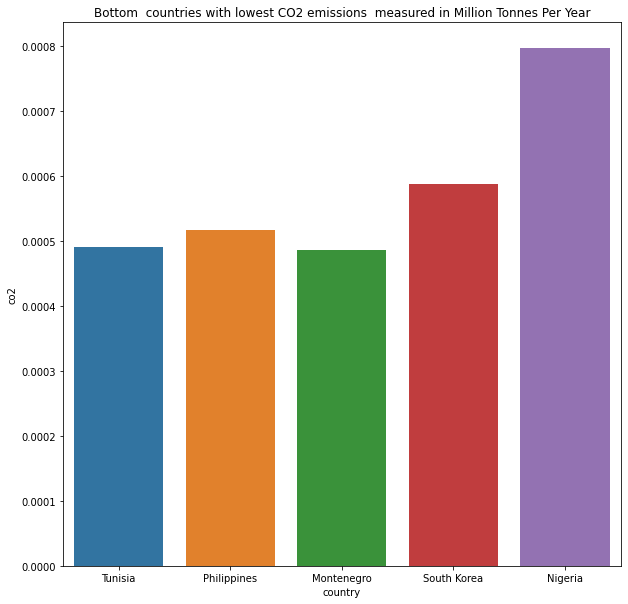

In [23]:
# Showing the bottom 5 countries emitting the lowest amount of CO2 

bottom_co2 = data.groupby('country')['co2'].sum().reset_index().sort_values(by=['co2'], ascending=True).head(5)['country'].tolist()

plt.figure(figsize=(10,10))
g = sns.barplot(
    data = data[data['country'].isin(bottom_co2)],
    x ='country',
    y ='co2',
    order = bottom_co2,
    ci=None
)
plt.title('Bottom  countries with lowest CO2 emissions  measured in Million Tonnes Per Year')
plt.show()

In [24]:
# Creating a time series chloropleth map for CO2 emissions 
fig = px.choropleth(
    data.groupby(['country', 'year'])['co2'].sum().reset_index().sort_values(by=['year'], ascending=True),
    locations='country',
    locationmode='country names',
    color='co2',
    color_continuous_scale='Spectral_r', # (_r) is used for inverting the color ramp
    height=750,
    animation_frame='year',
    animation_group='country'
)

fig.update_layout(
    title='CO2 Emissions in Million Tonnes Per Year'
)

fig.show()

# Creating some interactive graphs and maps for methane emissions

In [25]:
# Showing the top 5 countries emitting the highest amount of Methane Emissions

top_methane = data.groupby('country')['methane'].sum().reset_index().sort_values(by=['methane'], ascending=False).head(5)['country'].tolist()

fig = px.line(
    data[data['country'].isin(top_methane)],
    x='year',
    y='methane',
    color='country',
    title = 'Top countries with highest Methane Emissions measured in Million Tonnes of Carbon Dioxide Equivalents '
)

fig.show()

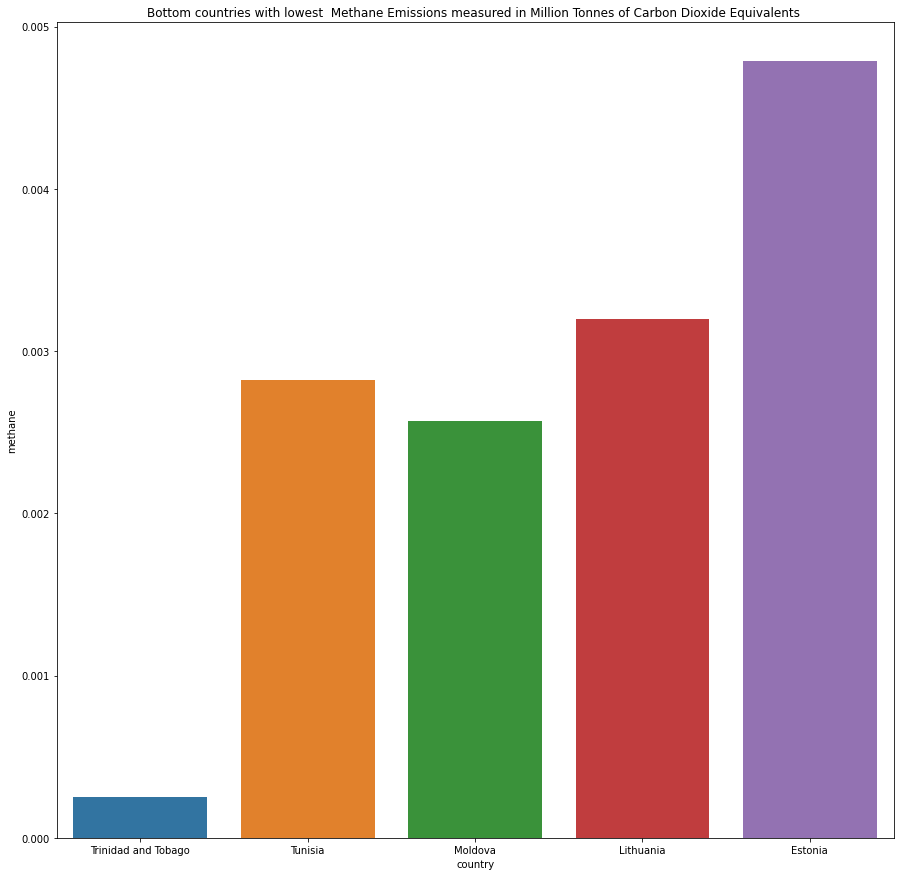

In [26]:
# Showing the bottom 5 countries emitting the lowest amount of Methane Emissions

bottom_methane = data.groupby('country')['methane'].sum().reset_index().sort_values(by=['methane'], ascending=True).head(5)['country'].tolist()

plt.figure(figsize=(15, 15))
g = sns.barplot(
    data = data[data['country'].isin(bottom_methane)],
    x ='country',
    y ='methane',
    order = bottom_methane,
    ci=None
)

#g.set(ylim=(0,0.004))
plt.title('Bottom countries with lowest  Methane Emissions measured in Million Tonnes of Carbon Dioxide Equivalents ')
plt.show()

In [27]:
# Creating a time series chloropleth map for  methane emissions
fig = px.choropleth(
    data.groupby(['country', 'year'])['methane'].sum().reset_index().sort_values(by=['year'], ascending=True),
    locations='country',
    locationmode='country names',
    color='methane',
    color_continuous_scale='Spectral_r', # (_r) is used for inverting the color ramp
    height=750,
    animation_frame='year',
    animation_group='country'
)

fig.update_layout(
    title='CO2 Emissions from Methane Emissions'
)

fig.show()

# Creating some interactive graphs and maps for Nitrous Oxide Emissions

In [28]:
# Showing the top 5 countries emitting the highest amount of nitrous oxide

top_nitrous_oxide = data.groupby('country')['nitrous_oxide'].sum().reset_index().sort_values(by=['nitrous_oxide'], ascending=False).head(5)['country'].tolist()

fig = px.line(
    data[data['country'].isin(top_nitrous_oxide)],
    x='year',
    y='nitrous_oxide',
    color='country',
    title = 'Top countries with highest Nitrous Oxide Emissions measured in Million Tonnes of Carbon Dioxide Equivalents '
)

fig.show()

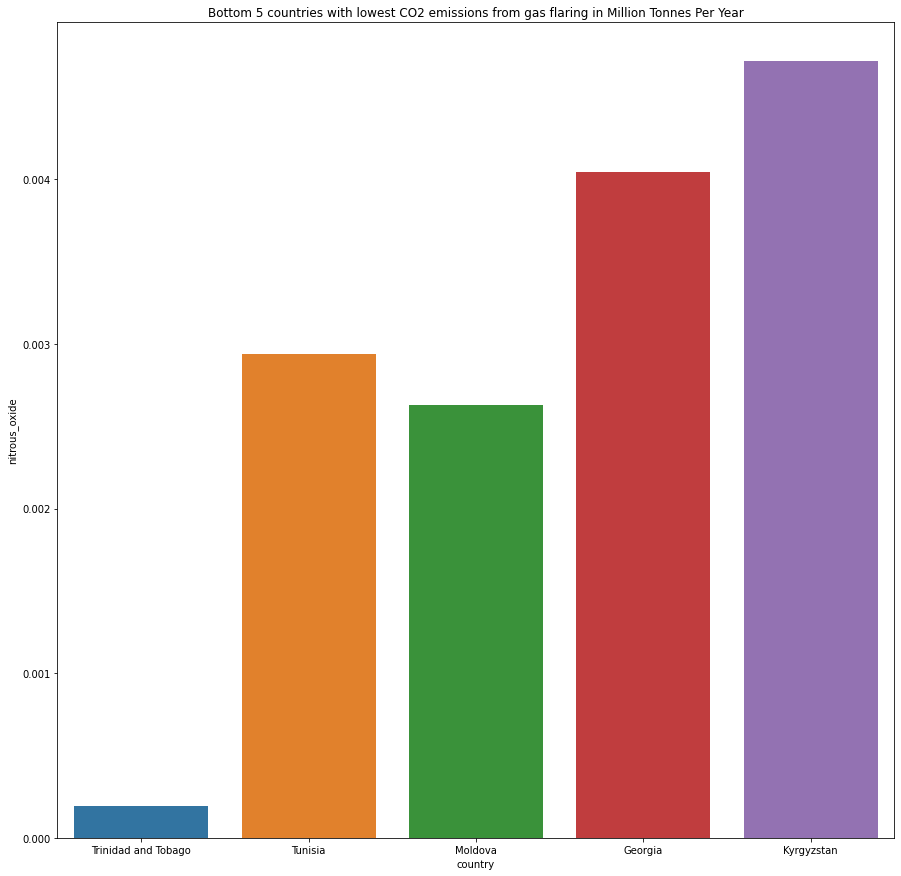

In [29]:
# Showing the bottom 5 countries emitting the lowest amount of Nitrous Oxide

bottom_nitrous_oxide = data.groupby('country')['nitrous_oxide'].sum().reset_index().sort_values(by=['nitrous_oxide'], ascending=True).head(5)['country'].tolist()

plt.figure(figsize=(15, 15))
g = sns.barplot(
    data = data[data['country'].isin(bottom_nitrous_oxide)],
    x ='country',
    y ='nitrous_oxide',
    order = bottom_nitrous_oxide,
    ci=None
)

# g.set(ylim=(0,0.004))
plt.title('Bottom 5 countries with lowest CO2 emissions from gas flaring in Million Tonnes Per Year')
plt.show()

In [30]:
# Creating a time series chloropleth map for nitrous_oxide
fig = px.choropleth(
    data.groupby(['country', 'year'])['nitrous_oxide'].sum().reset_index().sort_values(by=['year'], ascending=True),
    locations='country',
    locationmode='country names',
    color='nitrous_oxide',
    color_continuous_scale='Spectral_r', # (_r) is used for inverting the color ramp
    height=750,
    animation_frame='year',
    animation_group='country'
)

fig.update_layout(
    title='Nitrous Oxide Emissions'
)

fig.show()